In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

In [3]:
data = pd.read_csv(r"C:\Users\mansi\Documents\LetsUpgrade\Day 27\train.csv")

In [4]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
data.head()  #Dropiing columns with no relevance

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
#Label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])


In [9]:
#Modelling packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


## 1. KNN classification

In [10]:
y = data['Survived']
X = data.drop(['Survived'],axis=1)
#Splitting data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
#KNN
score = []
for i in range(1,268):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    score.append(accuracy_score(KNN.predict(X_test),y_test, normalize=True))

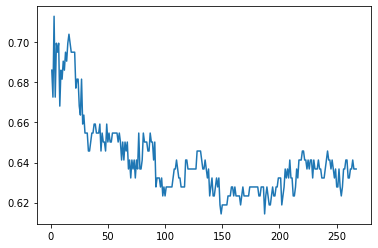

In [11]:
plt.plot(range(1,268), score)
    

In [12]:
# Keep the value of K below 25.


### 2. SVM Classification

In [16]:
from sklearn.svm import SVC
def Model(col):
    x = data.drop([col],axis=1)
    y = data[col]
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=0)
    SVM = SVC(gamma=0.01, C=100)
    SVM.fit(train_x, train_y)
    print(f"Accuracy score is {accuracy_score(SVM.predict(test_x),test_y, normalize=True)}")
    print("------------------------------------")
    print(f"Confusion matrix: \n{confusion_matrix(SVM.predict(test_x), test_y)}")

In [17]:
list_1= list(["Survived", "SibSp", "Sex", "Pclass"])
for item in list_1:
    print(Model(item))

Accuracy score is 0.7309417040358744
------------------------------------
Confusion matrix: 
[[103  31]
 [ 29  60]]
None
Accuracy score is 0.7892376681614349
------------------------------------
Confusion matrix: 
[[137  17   5   0   0   0   0]
 [ 15  30   0   2   0   0   0]
 [  1   4   2   1   0   0   0]
 [  0   0   0   2   0   0   0]
 [  1   0   0   1   2   0   0]
 [  0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   2]]
None
Accuracy score is 0.7085201793721974
------------------------------------
Confusion matrix: 
[[ 52  35]
 [ 30 106]]
None
Accuracy score is 0.9103139013452914
------------------------------------
Confusion matrix: 
[[ 53   4   1]
 [  5  33   4]
 [  1   5 117]]
None
